# Нейросеть с одним скрытым слоем на MNIST

Попробуем применить модель с одним скрытым слоем на датасете MNIST. Необходимо будет реализовать функцию, обучающую модель и понять, в какое качество мы "упираемся".

## Загрузим данные

In [1]:
import keras
import numpy as np

from keras.datasets import mnist
from keras.utils import np_utils

from keras.layers import Dense
from keras.layers.core import Activation
from keras.models import Sequential

import matplotlib.pyplot as plt

Using TensorFlow backend.


Для воспроизводимости расчетов воспользуемся стандартным разбиением на обучающую и тестовую выборки

In [2]:
train, test = mnist.load_data()

x_train = train[0]
y_train = train[1]

x_test = test[0]
y_test = test[1]

11493376/11490434 [==============================] - 0s 0us/step


Перед тем, как начать работу, посмотрите на данные глазами

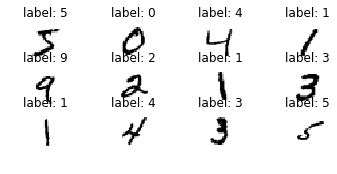

In [3]:
images_and_labels = list(zip(x_train,  y_train))
for index, (image, label) in enumerate(images_and_labels[:12]):
    plt.subplot(5, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('label: %i' % label )

Преобразуем данные: сделаем так, чтобы мы работали с матрицей, у которой значения от 0 до 1

In [4]:
x_train = x_train.reshape(60000, 28*28)
x_test = x_test.reshape(10000, 28*28)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


А таргет сделаем категориальной переменной (то есть значение таргета по индексу k будет говорить, является ли эта цифра k)

In [0]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## Построим модель для обучения

Зафиксируем гиперпараметры сети

In [0]:
batch_size = 128
epochs = 10

In [0]:
def get_accuracies_of_wide_model(units, data, batch_size=128, epochs=10, n_iterations=5):
    """
    Функция создает модель с одним скрытым слоем с количеством вершин units,
    обучается на данных data с гиперпараметрами batch_size и epochs количество
    раз, равное n_iterations и возвращает массив метрик качества на каждой итерации.
    
    Для функции активации используйте relu, на последнем слое используйте softmax.
    
    :param units: количество вершин (регулируем)
    :param batch_size: размер батча (берем по дефолту)
    :param epochs: количество эпох (берем по дефолту)
    :param n_iterations: количество итераций (берем по дефолту)
    :param data: кортеж, (x_train, y_train, x_test, y_test)
    :return: массив, качество на тестовой выборке по каждой итерации
    """
    
    x_train, y_train, x_test, y_test = data
    accuracies = []
    
    for i in range(n_iterations):
        model = Sequential()
        # добавление необходимых слоев
        model.add(Dense(units, activation="relu", input_shape=x_train.shape[1:]))
        model.add(Dense(10, activation="softmax"))
      
        # компилируем модель
        model.compile(optimizer="adam",
                loss='categorical_crossentropy',
                 metrics=["accuracy"])
        
        # обучение
        history = model.fit(x_train, y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            validation_data=(x_test, y_test))
        
        #получение конечного качества на тестовой выборке
        accuracy = history.history["acc"][-1]
        accuracies.append(accuracy)
    
    return accuracies

Переберем разное количество вершин в нашей сети. Чтобы сильно не напрягать компьютер, не берите больше 3000 вершин.

Задача со звездочкой: постройте график качества и посмотрите, изменяется ли оно

In [8]:
# делаем массив вершин (рекомендуем брать до 3000)
units_list = [1, 1000, 2000, 3000]
              
data = (x_train, y_train, x_test, y_test)
results = [get_accuracies_of_wide_model(units, data) for units in units_list]

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 46us/step - loss: 2.0204 - acc: 0.2064 - val_loss: 1.9139 - val_acc: 0.2139
Epoch 2/10
60000/60000 [==============================] - 1s 24us/step - loss: 1.8689 - acc: 0.2219 - val_loss: 1.8397 - val_acc: 0.2226
Epoch 3/10
60000/60000 [==============================] - 1s 24us/step - loss: 1.8147 - acc: 0.2333 - val_loss: 1.8037 - val_acc: 0.2345
Epoch 4/10
60000/60000 [==============================] - 1s 23us/step - loss: 1.7848 - acc: 0.2458 - val_loss: 1.7822 - val_acc: 0.2480
Epoch 5/10
60000/60000 [==============================] - 1s 24us/step - loss: 1.7644 - acc: 0.2573 - val_loss: 1.7675 - val_acc: 0.2523
Epoch 6/10
60000/60000 [==============================] - 1s 24us/step - loss: 1.7487 - acc: 0.2664 - val_loss: 1.7541 - val_acc: 0.2674
Epoch 7/

# Ответы для формы

Ответом для формы должно служить максимальное качество на тестовой выборке. Поскольку в keras результаты разнятся от запуска к запуску, правильный ответ будет засчитан как интервал

In [9]:
max_results = max([max(result) for result in results])
print('{:.4f}'.format(max_results))

0.9981
